# Question 2 

This notebook specifically investigates our second research questions: How have the different regional offices of SNAP performed over time in terms of their expenditure per person relative to the changing poverty rates of their associated states?

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_theme()


# Data Wrangling

In [11]:
snap_2010 = pd.ExcelFile(r'US_Public_Food_Assitance/SNAP_FY2010_FY2020/FY10.xls')
snap_2011 = pd.ExcelFile(r'US_Public_Food_Assitance/SNAP_FY2010_FY2020/FY11.xls')
snap_2012 = pd.ExcelFile(r'US_Public_Food_Assitance/SNAP_FY2010_FY2020/FY12.xls')
snap_2013 = pd.ExcelFile(r'US_Public_Food_Assitance/SNAP_FY2010_FY2020/FY13.xls')
snap_2014 = pd.ExcelFile(r'US_Public_Food_Assitance/SNAP_FY2010_FY2020/FY14.xls')
snap_2015 = pd.ExcelFile(r'US_Public_Food_Assitance/SNAP_FY2010_FY2020/FY15.xls')
snap_2016 = pd.ExcelFile(r'US_Public_Food_Assitance/SNAP_FY2010_FY2020/FY16.xls')
snap_2017 = pd.ExcelFile(r'US_Public_Food_Assitance/SNAP_FY2010_FY2020/FY17.xls')
snap_2018 = pd.ExcelFile(r'US_Public_Food_Assitance/SNAP_FY2010_FY2020/FY18.xls')
snap_2019 = pd.ExcelFile(r'US_Public_Food_Assitance/SNAP_FY2010_FY2020/FY19.xls')
snap_2020 = pd.ExcelFile(r'US_Public_Food_Assitance/SNAP_FY2010_FY2020/FY20.xls')

Totals = pd.Series

#Information on MARO (Delaware, District of Columbia, Maryland, New Jersey, Pennsylvania, Virginia, Virgin Islands
# West Virginia)

def condense_excel(data_name, region):
    data = pd.read_excel(data_name, region)
    data.columns = [region + ' Summary', 'Household Participation', 'Participants', 
                   'Total Cost', 'Cost per Household', 'Cost per Participant']
    index = data[data[region + ' Summary'] == region].index.values[0]
    data = data[index+1:index+14]
    data = data[data['Total Cost'].astype(str).str.contains("--") == False]
    return data

def condense_excel2(data_name, region):
    data = pd.read_excel(data_name, region)
    data.columns = [region.strip() + ' Summary', 'Household Participation', 'Participants', 
                   'Cost per Household', 'Cost per Participant', 'Total Cost']
    index = data[data[region.strip() + ' Summary'] == region.strip()].index.values[0]
    data = data[data['Total Cost'].astype(str).str.contains("--") == False]
    return data[index+1:index+14]



MARO_2010 = condense_excel2(snap_2010, 'MARO')
MARO_2011 = condense_excel2(snap_2011, 'MARO')
MARO_2012 = condense_excel2(snap_2012, 'MARO')
MARO_2013 = condense_excel2(snap_2013, 'MARO')
MARO_2014 = condense_excel2(snap_2014, 'MARO')
MARO_2015 = condense_excel(snap_2015, 'MARO')
MARO_2016 = condense_excel(snap_2016, 'MARO')
MARO_2017 = condense_excel(snap_2017, 'MARO')
MARO_2018 = condense_excel(snap_2018, 'MARO')
MARO_2019 = condense_excel(snap_2019, 'MARO')
MARO_2020 = condense_excel(snap_2020, 'MARO')

MARO = pd.concat([MARO_2010, MARO_2011, MARO_2012, MARO_2013, MARO_2014, MARO_2015, MARO_2016, MARO_2017, MARO_2018, MARO_2019, MARO_2020])
MARO = MARO[MARO["MARO Summary"] != "Total"]
MARO.reset_index()
MARO['Year'] = MARO['MARO Summary'].str.extract('(\d+)', expand=True)
MARO = MARO.drop(columns = ['MARO Summary'])
MARO = MARO.groupby('Year').sum()
MARO['Region'] = 'MARO'
MARO = MARO.reset_index()
MARO = MARO[(MARO['Year'] != '2009')]

# MPRO (Colorado, Iowa, Kansas, Missouri, Montana, Nebraska, North Dakota, South Dakota, Utah, Wyoming)

MPRO_2010 = condense_excel2(snap_2010, 'MPRO')
MPRO_2011 = condense_excel2(snap_2011, 'MPRO')
MPRO_2012 = condense_excel2(snap_2012, 'MPRO')
MPRO_2013 = condense_excel2(snap_2013, 'MPRO')
MPRO_2014 = condense_excel2(snap_2014, 'MPRO')
MPRO_2015 = condense_excel(snap_2015, 'MPRO')
MPRO_2016 = condense_excel(snap_2016, 'MPRO')
MPRO_2017 = condense_excel(snap_2017, 'MPRO')
MPRO_2018 = condense_excel(snap_2018, 'MPRO')
MPRO_2019 = condense_excel(snap_2019, 'MPRO')
MPRO_2020 = condense_excel(snap_2020, 'MPRO')

MPRO = pd.concat([MPRO_2010, MPRO_2011, MPRO_2012, MPRO_2013, MPRO_2014, MPRO_2015, MPRO_2016, MPRO_2017, MPRO_2018, MPRO_2019, MPRO_2020])
MPRO = MPRO[MPRO["MPRO Summary"] != "Total"]
MPRO.reset_index()
MPRO['Year'] = MPRO['MPRO Summary'].str.extract('(\d+)', expand=True)
MPRO = MPRO.drop(columns = ['MPRO Summary'])
MPRO = MPRO.groupby('Year').sum()
MPRO['Region'] = 'MPRO'
MPRO = MPRO.reset_index()
MPRO = MPRO[(MPRO['Year'] != '2009')]

# MWRO

MWRO_2010 = condense_excel2(snap_2010, 'MWRO')
MWRO_2011 = condense_excel2(snap_2011, 'MWRO')
MWRO_2012 = condense_excel2(snap_2012, 'MWRO')
MWRO_2013 = condense_excel2(snap_2013, 'MWRO')
MWRO_2014 = condense_excel2(snap_2014, 'MWRO')
MWRO_2015 = condense_excel(snap_2015, 'MWRO')
MWRO_2016 = condense_excel(snap_2016, 'MWRO')
MWRO_2017 = condense_excel(snap_2017, 'MWRO')
MWRO_2018 = condense_excel(snap_2018, 'MWRO')
MWRO_2019 = condense_excel(snap_2019, 'MWRO')
MWRO_2020 = condense_excel(snap_2020, 'MWRO')

MWRO = pd.concat([MWRO_2010, MWRO_2011, MWRO_2012, MWRO_2013, MWRO_2014, MWRO_2015, MWRO_2016, MWRO_2017, MWRO_2018, MWRO_2019, MWRO_2020])
MWRO = MWRO[MWRO["MWRO Summary"] != "Total"]
MWRO.reset_index()
MWRO['Year'] = MWRO['MWRO Summary'].str.extract('(\d+)', expand=True)
MWRO = MWRO.drop(columns = ['MWRO Summary'])
MWRO = MWRO.groupby('Year').sum()
MWRO['Region'] = 'MWRO'
MWRO = MWRO.reset_index()
MWRO = MWRO[(MWRO['Year'] != '2009')]


# NERO

NERO_2010 = condense_excel2(snap_2010, 'NERO')
NERO_2011 = condense_excel2(snap_2011, 'NERO')
NERO_2012 = condense_excel2(snap_2012, 'NERO')
NERO_2013 = condense_excel2(snap_2013, 'NERO')
NERO_2014 = condense_excel2(snap_2014, 'NERO')
NERO_2015 = condense_excel(snap_2015, 'NERO')
NERO_2016 = condense_excel(snap_2016, 'NERO')
NERO_2017 = condense_excel(snap_2017, 'NERO')
NERO_2018 = condense_excel(snap_2018, 'NERO')
NERO_2019 = condense_excel(snap_2019, 'NERO')
NERO_2020 = condense_excel(snap_2020, 'NERO')

NERO = pd.concat([NERO_2010, NERO_2011, NERO_2012, NERO_2013, NERO_2014, NERO_2015, NERO_2016, NERO_2017, NERO_2018, NERO_2019, NERO_2020])
NERO = NERO[NERO["NERO Summary"] != "Total"]
NERO.reset_index()
NERO['Year'] = NERO['NERO Summary'].str.extract('(\d+)', expand=True)
NERO = NERO.drop(columns = ['NERO Summary'])
NERO = NERO.groupby('Year').sum()
NERO['Region'] = 'NERO'
NERO = NERO.reset_index()
NERO = NERO[(NERO['Year'] != '2009')]

# SERO

SERO_2010 = condense_excel2(snap_2010, 'SERO')
SERO_2011 = condense_excel2(snap_2011, 'SERO')
SERO_2012 = condense_excel2(snap_2012, 'SERO')
SERO_2013 = condense_excel2(snap_2013, 'SERO')
SERO_2014 = condense_excel2(snap_2014, 'SERO')
SERO_2015 = condense_excel(snap_2015, 'SERO')
SERO_2016 = condense_excel(snap_2016, 'SERO')
SERO_2017 = condense_excel(snap_2017, 'SERO')
SERO_2018 = condense_excel(snap_2018, 'SERO')
SERO_2019 = condense_excel(snap_2019, 'SERO')
SERO_2020 = condense_excel(snap_2020, 'SERO')

SERO = pd.concat([SERO_2010, SERO_2011, SERO_2012, SERO_2013, SERO_2014, SERO_2015, SERO_2016, SERO_2017, SERO_2018, SERO_2019, SERO_2020])
SERO = SERO[SERO["SERO Summary"] != "Total"]
SERO.reset_index()
SERO['Year'] = SERO['SERO Summary'].str.extract('(\d+)', expand=True)
SERO = SERO.drop(columns = ['SERO Summary'])
SERO = SERO.groupby('Year').sum()
SERO['Region'] = 'SERO'
SERO = SERO.reset_index()
SERO = SERO[(SERO['Year'] != '2009')]


# SWRO 
SWRO_2010 = condense_excel2(snap_2010, 'SWRO ')
SWRO_2011 = condense_excel2(snap_2011, 'SWRO ')
SWRO_2012 = condense_excel2(snap_2012, 'SWRO ')
SWRO_2013 = condense_excel2(snap_2013, 'SWRO ')
SWRO_2014 = condense_excel2(snap_2014, 'SWRO ')
SWRO_2015 = condense_excel(snap_2015, 'SWRO')
SWRO_2016 = condense_excel(snap_2016, 'SWRO')
SWRO_2017 = condense_excel(snap_2017, 'SWRO')
SWRO_2018 = condense_excel(snap_2018, 'SWRO')
SWRO_2019 = condense_excel(snap_2019, 'SWRO')
SWRO_2020 = condense_excel(snap_2020, 'SWRO')

SWRO = pd.concat([SWRO_2010, SWRO_2011, SWRO_2012, SWRO_2013, SWRO_2014, SWRO_2015, SWRO_2016, SWRO_2017, SWRO_2018, SWRO_2019, SWRO_2020])
SWRO = SWRO[SWRO["SWRO Summary"] != "Total"]
SWRO.reset_index()
SWRO['Year'] = SWRO['SWRO Summary'].str.extract('(\d+)', expand=True)
SWRO = SWRO.drop(columns = ['SWRO Summary'])
SWRO = SWRO.groupby('Year').sum()
SWRO['Region'] = 'SWRO'
SWRO = SWRO.reset_index()
SWRO = SWRO[(SWRO['Year'] != '2009')]


# WRO

WRO_2010 = condense_excel2(snap_2010, 'WRO')
WRO_2011 = condense_excel2(snap_2011, 'WRO')
WRO_2012 = condense_excel2(snap_2012, 'WRO')
WRO_2013 = condense_excel2(snap_2013, 'WRO')
WRO_2014 = condense_excel2(snap_2014, 'WRO')
WRO_2015 = condense_excel(snap_2015, 'WRO')
WRO_2016 = condense_excel(snap_2016, 'WRO')
WRO_2017 = condense_excel(snap_2017, 'WRO')
WRO_2018 = condense_excel(snap_2018, 'WRO')
WRO_2019 = condense_excel(snap_2019, 'WRO')
WRO_2020 = condense_excel(snap_2020, 'WRO')

WRO = pd.concat([WRO_2010, WRO_2011, WRO_2012, WRO_2013, WRO_2014, WRO_2015, WRO_2016, WRO_2017, WRO_2018, WRO_2019, WRO_2020])
WRO = WRO[WRO["WRO Summary"] != "Total"]
WRO.reset_index()
WRO['Year'] = WRO['WRO Summary'].str.extract('(\d+)', expand=True)
WRO = WRO.drop(columns = ['WRO Summary'])
WRO = WRO.groupby('Year').sum()
WRO['Region'] = 'WRO'
WRO = WRO.reset_index()
WRO = WRO[(WRO['Year'] != '2009')]

ComboTotal=pd.concat([MARO,MPRO,MWRO, NERO, SERO, SWRO, WRO],axis=0, ignore_index = True)

ComboTotal

Year  Household Participation  Participants  Cost per Household  \
0   2010                 24306615      51273558           3243.0321   
1   2011                 27446947      56929079           3235.5337   
2   2012                 29064051      59360290           3180.0290   
3   2013                 29987610      60815151           3065.5962   
4   2014                 30242790      60812258           2894.6381   
..   ...                      ...           ...                 ...   
65  2015                 47917113      98134228           3313.6997   
66  2016                 45341607      91665076           3252.3765   
67  2017                 39728143      78760409           3193.6247   
68  2018                 38644761      75202117           3097.5330   
69  2019                 33283482      62680775           2819.5639   

    Cost per Participant   Total Cost Region  
0              1537.1377   6568703640   MARO  
1              1559.8018   7402042744   MARO  
2              1557.0135   7703717158   MARO  
3              1511.5145   7659983283   MARO  
4              1439.5560   7295514769   MARO  
..                   ...          ...    ...  
65             1617.9773  13231722085    WRO  
66             1609.4152  12290726079    WRO  
67             1610.9326  10573704445    WRO  
68             1591.8803   9975793519    WRO  
69             1491.3839   8694496843    WRO  

[70 rows x 7 columns]

In [5]:
df = pd.read_excel('hstpov21.xlsx', sheet_name='pov21').dropna().reset_index(drop = True)
df['Year'] = None


for i in range((11)*52): #11 years * 52 lines per year
    df.iloc[i, df.columns.get_loc('Year')] = 2020 - (int(i/51))

drop1 = np.linspace(0,572, 12).astype(int)
df.drop(drop1, axis = 0, inplace = True)
df.columns = ['State', 'Total', 'Below poverty', 'Standard error', 'Percent', 'Standard error','Year']
WRO = ['California', 'Oregon', 'Washington', 'Nevada', 'Idaho', 'Alaska', 'Hawaii']
MPRO = ['Montana', 'Wyoming','Colorado', 'Nebraska', 'Kansas', 'Missouri', 'North Dakota', 'South Dakota']
MWRO = ['Minnesota', 'Iowa', 'Wisconsin', 'Illinois', 'Indiana', 'Michigan', 'Ohio']
MARO = ['Pennsylvania', 'West Virginia', 'Virginia', 'Maryland', 'Deleware','New Jersey']
NERO = ['Maine', 'New Hampshire', 'Vermont', 'New York', 'Massachusates', 'Connecticut', 'Rhode Island']
SWRO = ['Utah', 'New Mexico', 'Texas','Oklahoma', 'Arkansas', 'Louisiana', 'Arizona']
SERO = ['Florida', 'Georgia', 'Mississippi', 'Alabama', 'South Carolina', 'North Carolina', 'Tennessee', 'Kentucky']
df['Region'] = "None"

for i in range(2224):
    if df.iloc[i]['State'] in WRO:
        df.iloc[i, df.columns.get_loc('Region')] = df.iloc[i,7].replace(df.iloc[i,7], 'WRO')
    if df.iloc[i]['State'] in MPRO:
        df.iloc[i,  df.columns.get_loc('Region')] = df.iloc[i,7].replace(df.iloc[i,7], 'MPRO')
    if df.iloc[i]['State'] in MWRO:
        df.iloc[i,  df.columns.get_loc('Region')] = df.iloc[i,7].replace(df.iloc[i,7], 'MWRO')
    if df.iloc[i]['State'] in MARO:
        df.iloc[i,  df.columns.get_loc('Region')] = df.iloc[i,7].replace(df.iloc[i,7], 'MARO')
    if df.iloc[i]['State'] in NERO:
        df.iloc[i,  df.columns.get_loc('Region')] = df.iloc[i,7].replace(df.iloc[i,7], 'NERO')
    if df.iloc[i]['State'] in SWRO:
        df.iloc[i,  df.columns.get_loc('Region')] = df.iloc[i,7].replace(df.iloc[i,7], 'SWRO')
    if df.iloc[i]['State'] in SERO:
        df.iloc[i,  df.columns.get_loc('Region')] = df.iloc[i,7].replace(df.iloc[i,7], 'SERO')
        
# problem rows
df = df[df["Percent"] != "Percent"]

<AxesSubplot:xlabel='Year', ylabel='Percent'>

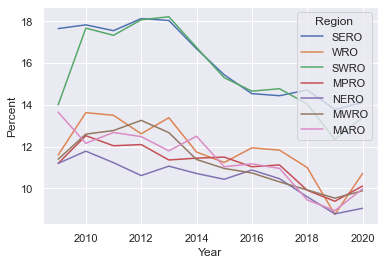

In [6]:
df["Year"] = pd.to_numeric(df["Year"])
df["Percent"] = pd.to_numeric(df["Percent"])
sns.lineplot(x='Year', 
             y='Percent',
             hue='Region',
             data=df[df['Region'] != "None"],
            ci = None)


[Text(0.5, 1.0, 'Total Contribution by SNAP')]

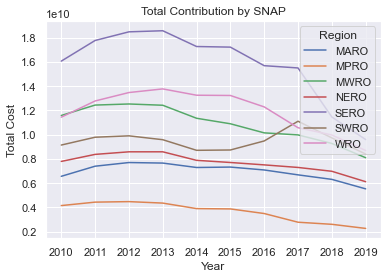

In [7]:
sns.lineplot(x='Year', 
             y='Total Cost',
             hue='Region',
             data= ComboTotal).set(title = 'Total Contribution by SNAP')

[Text(0.5, 1.0, 'Total Contribution to Each Household by SNAP')]

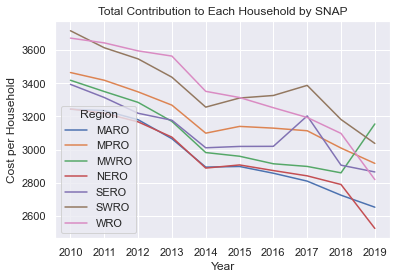

In [8]:
sns.lineplot(x='Year', 
             y='Cost per Household',
             hue='Region',
             data= ComboTotal).set(title = 'Total Contribution to Each Household by SNAP')

[Text(0.5, 1.0, 'Total Participants of SNAP')]

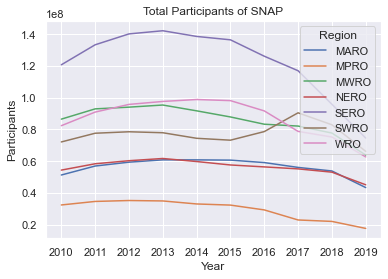

In [9]:
sns.lineplot(x='Year', 
             y='Participants',
             hue='Region',
             data= ComboTotal).set(title = 'Total Participants of SNAP')